In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
pd.read_stata('ajr.dta')

,longname,shortnam,mort,logmort0,risk,loggdp,latitude,neoeuro,asia,africa,other,rainmin,meantemp,malaria
0,Angola,AGO,280.000000,5.634789,5.36,7.77,0.1367,0,0,1,0,0,26,1.000000
1,Argentina,ARG,68.900002,4.232656,6.39,9.13,0.3778,0,0,0,0,56,17,0.000000
2,Australia,AUS,8.550000,2.145931,9.32,9.90,0.3000,1,0,0,1,41,17,0.000000
3,Burkina Faso,BFA,280.000000,5.634789,4.45,6.85,0.1444,0,0,1,0,0,29,1.000000
4,Bangladesh,BGD,71.410004,4.268438,5.14,6.88,0.2667,0,1,0,0,2,25,0.178620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,USA,USA,15.000000,2.708050,10.00,10.22,0.4222,1,0,0,0,66,12,0.000000
58,Venezuela,VEN,78.099998,4.357990,7.14,9.07,0.0889,0,0,0,0,10,20,0.002234
59,Vietnam,VNM,140.000000,4.941642,6.41,7.28,0.1778,0,1,0,0,18,25,0.715458
60,South Africa,ZAF,15.500000,2.740840,6.86,8.89,0.3222,0,0,1,0,8,19,0.000000


In [25]:
pd.read_stata('bm.dta')

,education,ofjobs,yearsexp,computerskills,call,female,black
0,4,2,6,1,0.0,1.0,0.0
1,3,3,6,1,0.0,1.0,0.0
2,4,1,6,1,0.0,1.0,1.0
3,3,4,6,1,0.0,1.0,1.0
4,3,3,22,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...
4865,3,2,1,1,0.0,1.0,1.0
4866,4,4,6,1,0.0,1.0,1.0
4867,4,6,8,1,0.0,0.0,0.0
4868,4,4,2,1,0.0,1.0,1.0


In [27]:
df = pd.read_stata('wagepan.dta')

In [32]:
df.head()

,nr,year,logwage,union,educ,exper,expersq,hours,black,hisp,...,occ7,occ8,occ9,d81,d82,d83,d84,d85,d86,d87
0,13,1980,1.197540,0,14,1,1,2672,0,0,...,0,0,1,0,0,0,0,0,0,0
1,13,1981,1.853060,1,14,2,4,2320,0,0,...,0,0,1,1,0,0,0,0,0,0
2,13,1982,1.344462,0,14,3,9,2940,0,0,...,0,0,1,0,1,0,0,0,0,0
3,13,1983,1.433213,0,14,4,16,2960,0,0,...,0,0,1,0,0,1,0,0,0,0
4,13,1984,1.568125,0,14,5,25,3071,0,0,...,0,0,0,0,0,0,1,0,0,0


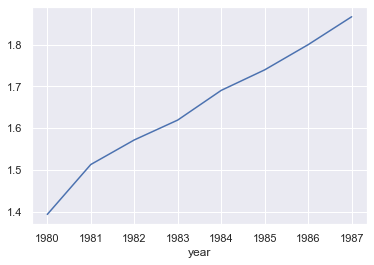

In [31]:
df.groupby('year').logwage.mean().plot()

In [35]:
params = sm.OLS(df.logwage,sm.add_constant(df.loc[:,'d81':'d87'])).fit().params
params[1:] = params[1:] + params[0]

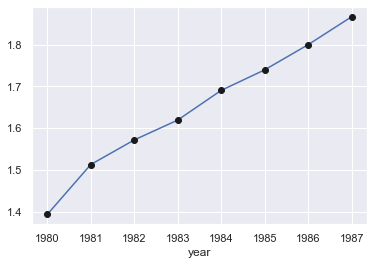

In [38]:
df.groupby('year').logwage.mean().plot()
plt.plot(range(1980,1987+1),params,'ok')